In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_viirs= pd.read_csv(r"E:\Azadeh\Data Science-Lighthouse\Datasets\ForestFire\viirs-snpp_2021_Canada.csv")

In [ ]:
df_viirs.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,47.582764,-65.124184,339.45,0.38,0.36,2021-01-01,618,N,VIIRS,n,1,268.35,6.32,N,0
1,47.579502,-65.125313,300.15,0.38,0.36,2021-01-01,618,N,VIIRS,n,1,262.71,6.32,N,0
2,53.639542,-104.135185,329.87,0.41,0.60,2021-01-01,800,N,VIIRS,n,1,254.15,2.60,N,0
3,56.655121,-118.570511,322.87,0.51,0.41,2021-01-01,942,N,VIIRS,n,1,248.97,2.92,N,0
4,55.236225,-115.381966,326.16,0.41,0.37,2021-01-01,942,N,VIIRS,n,1,266.01,2.20,N,0


In [ ]:
# Checking the dataset 
# The output shows taht we don't have null values in the dataset 
df_viirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450281 entries, 0 to 450280
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    450281 non-null  float64
 1   longitude   450281 non-null  float64
 2   bright_ti4  450281 non-null  float64
 3   scan        450281 non-null  float64
 4   track       450281 non-null  float64
 5   acq_date    450281 non-null  object 
 6   acq_time    450281 non-null  int64  
 7   satellite   450281 non-null  object 
 8   instrument  450281 non-null  object 
 9   confidence  450281 non-null  object 
 10  version     450281 non-null  int64  
 11  bright_ti5  450281 non-null  float64
 12  frp         450281 non-null  float64
 13  daynight    450281 non-null  object 
 14  type        450281 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 51.5+ MB


In [ ]:
df_viirs.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
count,450281.000000,450281.000000,450281.000000,450281.000000,450281.000000,450281.000000,450281.0,450281.000000,450281.000000,450281.000000
mean,53.369247,-107.375666,327.293284,0.463738,0.479465,1362.397361,1.0,291.602043,15.626514,0.552508
std,3.849306,12.810153,21.553263,0.086799,0.113269,531.593065,0.0,11.846830,41.678353,1.151572
min,41.799404,-140.099655,208.000000,0.320000,0.360000,506.000000,1.0,212.230000,0.010000,0.000000
25%,50.895771,-119.909752,307.370000,0.400000,0.380000,906.000000,1.0,285.210000,1.920000,0.000000
50%,52.287014,-104.277161,328.750000,0.440000,0.440000,1036.000000,1.0,290.210000,4.360000,0.000000
75%,55.461166,-96.118851,343.500000,0.520000,0.560000,1930.000000,1.0,297.250000,12.150000,0.000000
max,82.567329,-52.665245,367.000000,0.800000,0.780000,2336.000000,1.0,380.000000,1643.050000,3.000000


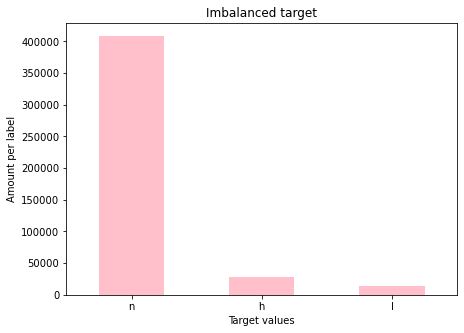

In [7]:
# plot the distribution of classes
fig= plt.figure(figsize=(7,5)) 

df_viirs['confidence'].value_counts().plot(kind='bar', color={'pink'})
plt.title('Imbalanced target')
plt.xlabel('Target values')
plt.ylabel('Amount per label')
plt.xticks(rotation=1)

plt.show()


In [10]:
# convert acq_date into datatime format
df_viirs['acq_date'] = pd.to_datetime(df_viirs['acq_date'], format = '%Y-%m-%dT', errors = 'coerce')
df_viirs['year'] = df_viirs['acq_date'].dt.year
df_viirs['month'] = df_viirs['acq_date'].dt.month
df_viirs['day'] = df_viirs['acq_date'].dt.day

C:\Users\AzFar\AppData\Local\Temp/ipykernel_167680/3613896302.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.countplot(x ='month_map', data=df_viz).set(Title='Number of hotspot captured in each month')


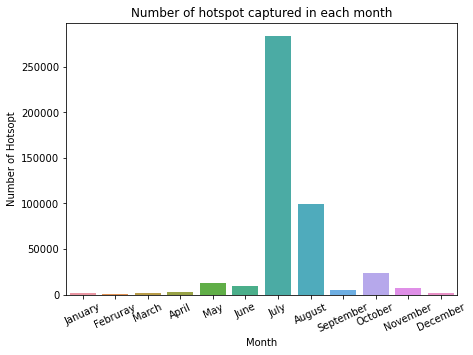

In [11]:
# in which month the most hotspot captured
import seaborn as sns

df_viz= df_viirs.copy() 
month_map= {1:'January',2:'Februray',3:'March',4:'April',5:'May',6:'June',7:'July',
            8:'August',9:'September',10:'October',11:'November',12:'December'}
df_viz['month_map']= df_viz['month'].map(month_map)

fig= plt.figure(figsize=(7,5)) 
sns.countplot(x ='month_map', data=df_viz).set(Title='Number of hotspot captured in each month')
plt.xticks(rotation=25)
#plt.bar(width=0.4)
plt.ylabel('Number of Hotsopt')
plt.xlabel('Month')
plt.show()